In [3]:
import os
import csv
import pandas as pd
import numpy as np
import datetime
import json
import re
import nltk

import matplotlib.pyplot as plt
from string import punctuation

In [4]:
dataframe_collection = {}
for i in range(2015,2019):
    with open('C:/Users/vijle/Downloads/TA/Assignment 1 trump tweet/trump'+str(i)+'.json', 'r',encoding= 'UTF-8') as fp:
        trumpTweets = json.load(fp)
        newdata = pd.DataFrame(trumpTweets)
        newdata['Tweeted Month'] = str(newdata['created_at']).split(' ')[8]
        tweetedYear = str(i)
        dataframe_collection[tweetedYear] = newdata

In [47]:
#making dictionary of tweets based of year key value and store the texts in list for the dictionary value

tweetlist = {}
hashtagslist = {}
handleslist = {}
words = {}
newTweetListsforYears = {}
for i in range(2015,2019):
    df = dataframe_collection[str(i)]
    tweetStringsList = str(i)
    tweetstring = ''
    tweetWP = ''
    tweetWU = ''
    newTweetList = []
    for y in df.index:
        tweetstring = tweetstring + ' ' + df.loc[y, 'text']
        newTweetList.append(df.loc[y, 'text']) 
        #regex operation
        tweetWP = tweetstring.strip(punctuation).lower()
        tweetWU = re.sub(r'http\S+', ' ', tweetWP)
        words[tweetStringsList] = tweetWU.split()
    tweetlist[tweetStringsList] = tweetWU
    newTweetListsforYears[tweetStringsList] = newTweetList


In [9]:
# collecting handles and hashtags

for i in range(2015,2019):
    hashtags = []
    handles = []
    for w in words[str(i)]:
        if re.search(r'^#\w+', w):
            hashtags.append(w)
        if re.search(r'^@\w+', w):
            handles.append(w)
    handles = [re.sub(r'[!?\.]+', '', h) for h in handles]
    hashtagslist[str(i)] = hashtags
    handleslist[str(i)] = handles

In [11]:
#based on year store the numbers of how many times handle and hashtags were mentioned
handles_dict2015 = {}
handles_dict2016 = {}
handles_dict2017 = {}
handles_dict2018 = {}

for w in handleslist['2015']:
    if w in handles_dict2015:  
        handles_dict2015[w] += 1  
    else:  
        handles_dict2015[w] = 1 
    
for w in handleslist['2016']:
    if w in handles_dict2016:  
        handles_dict2016[w] += 1  
    else:  
        handles_dict2016[w] = 1 

for w in handleslist['2017']:
    if w in handles_dict2017:  
        handles_dict2017[w] += 1  
    else:  
        handles_dict2017[w] = 1 
        
for w in handleslist['2018']:
    if w in handles_dict2018:  
        handles_dict2018[w] += 1  
    else:  
        handles_dict2018[w] = 1 



In [12]:
#for sorting to collect top 15 handles mentioned
#For time period Jan 2015 - Jan 2016
handles_freq2015 = []
for key, value in handles_dict2015.items():
    handles_freq2015.append((value, key))
handles_freq2015.sort(reverse=True)
top15_2015 = handles_freq2015[0:15]
count15, handlenames15 = zip(*top15_2015)

#For time period Jan 2016 - Jan 2017
handles_freq2016 = []
for key, value in handles_dict2016.items():
    handles_freq2016.append((value, key))
handles_freq2016.sort(reverse=True)
top15_2016 = handles_freq2016[0:15]
count16, handlenames16 = zip(*top15_2016)
    
#For time period Jan 2017 - Jan 2018
handles_freq2017 = []
for key, value in handles_dict2017.items():
    handles_freq2017.append((value, key))
handles_freq2017.sort(reverse=True)
top15_2017 = handles_freq2017[0:15]
count17, handlenames17 = zip(*top15_2017)
    
#For time period Jan 2018 - Jan 2019
handles_freq2018 = []
for key, value in handles_dict2018.items():
    handles_freq2018.append((value, key))
handles_freq2018.sort(reverse=True)
top15_2018 = handles_freq2018[0:15]
count18, handlenames18 = zip(*top15_2018)

## Top 15 twitter handles mentioned by donald trump from Jan 2015- Jan 2016

Text(0.5, 1.0, 'Famous top 15 twitter handles mentioned by donald trump from Jan 2015- Jan 2016')

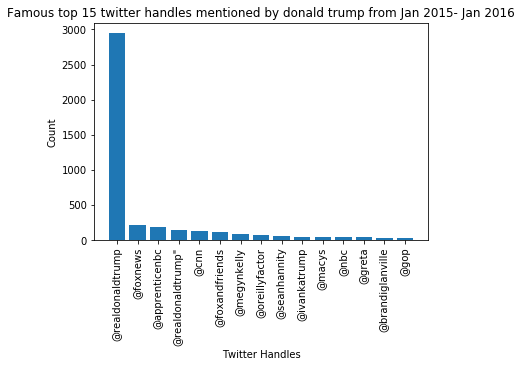

In [13]:
plt.bar(handlenames15, count15)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Famous top 15 twitter handles mentioned by donald trump from Jan 2015- Jan 2016')

## Top 15 twitter handles mentioned by donald trump from Jan 2016- Jan 2017

Text(0.5, 1.0, 'Famous top 15 twitter handles mentioned by donald trump from Jan 2016- Jan 2017')

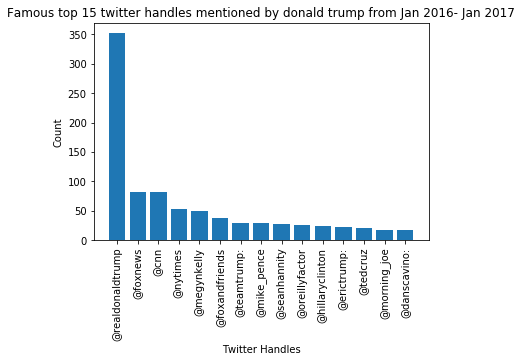

In [14]:
plt.bar(handlenames16, count16)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Famous top 15 twitter handles mentioned by donald trump from Jan 2016- Jan 2017')

## Top 15 twitter handles mentioned by donald trump from Jan 2017- Jan 2018

Text(0.5, 1.0, 'Famous top 15 twitter handles mentioned by donald trump from Jan 2017- Jan 2018')

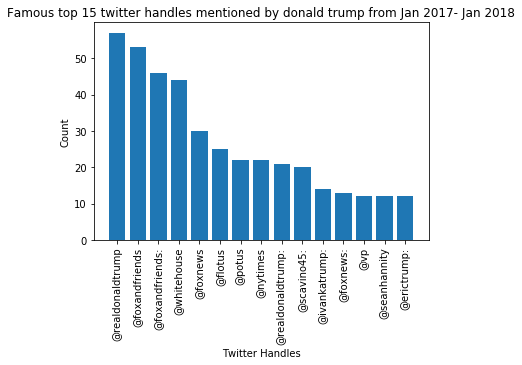

In [15]:
plt.bar(handlenames17, count17)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Famous top 15 twitter handles mentioned by donald trump from Jan 2017- Jan 2018')

## Top 15 twitter handles mentioned by donald trump from Jan 2018 - Jan 2019

Text(0.5, 1.0, 'Famous top 15 twitter handles mentioned by donald trump from Jan 2018- Jan 2019')

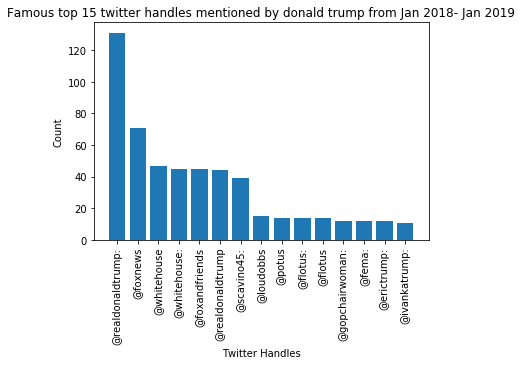

In [16]:
plt.bar(handlenames18, count18)
plt.xlabel('Twitter Handles')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Famous top 15 twitter handles mentioned by donald trump from Jan 2018- Jan 2019')

## Most frequently used words

In [17]:
tweetlistyear = {}
for i in range(2015,2019):
    string = tweetlist[str(i)]
    string = re.sub(r'@\S+', '',string) #removing tweet mentions
    string = re.sub(r'#\S+', '',string) #removing hashtags
    string = re.sub(r'&\w+', '',string) #removing &
    string = re.sub(r'[^a-z\s]+', '',string) #removing single letters
    string = re.sub(r'\s\w\s', '',string) #removing unicode word character
    string = string.lower() #converting word to lower
    
    tweetlistyear[str(i)] = string

In [19]:
Words_yeardict = {}

for i in range (2015,2019):
    words = []
    words = tweetlistyear[str(i)].split()
    Words_yeardict[str(i)] = words

In [20]:
#removing stop words for corpus preparation

from nltk.corpus import stopwords

cleaned_words = {}

for i in range (2015,2019):
    word = Words_yeardict[str(i)]
    cleaned = []
    for j in word:
        if j not in stopwords.words('english'):
            wordtest = j
            #print(wordtest)
            cleaned.append(wordtest)
            continue
        
    cleaned_words[str(i)] = cleaned


In [21]:
#doing porter stemming on tokenized words
stemmed_words = {}

for i in range(2015,2019):
    pstemmed = []
    porter = nltk.stem.PorterStemmer()
    for w in cleaned_words[str(i)]:
        pstemmed.append(porter.stem(w))
        
    stemmed_words[str(i)] = pstemmed 

In [22]:
words_count = {}

for i in range (2015,2019):
    wordskeys = str(i)
    year_wordsvalue = []
    year_words = {}
    for j in stemmed_words[str(i)]:
        year_wordskey = str(j)
        year_wordsvalue = stemmed_words[str(i)].count(year_wordskey)
        year_words[year_wordskey] = year_wordsvalue
    
    words_count[wordskeys] = year_words

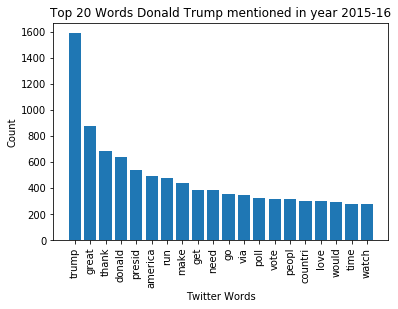

In [24]:
#Words Frequency 2015-16
wordlist_freq2015 = []

for key, value in words_count['2015'].items():
    wordlist_freq2015.append((value, key))
    
wordlist_freq2015.sort(reverse=True)
top20words_2015 = wordlist_freq2015[0:20]
values, word = zip(*top20words_2015)
top20words_2015[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 20 Words Donald Trump mentioned in year 2015-16')
plt.show()

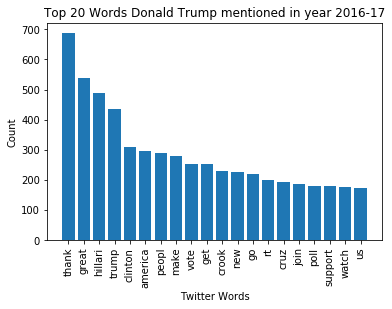

In [25]:
#Words Frequency 2016-17
wordlist_freq2016 = []

for key, value in words_count['2016'].items():
    wordlist_freq2016.append((value, key))
    
wordlist_freq2016.sort(reverse=True)
top20words_2016 = wordlist_freq2016[0:20]
values, word = zip(*top20words_2016)
top20words_2016[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 20 Words Donald Trump mentioned in year 2016-17')
plt.show()

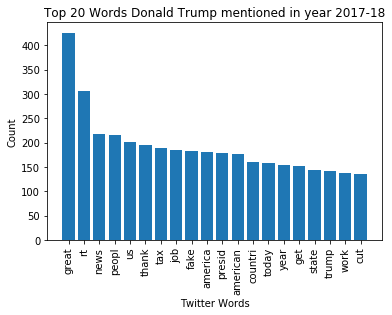

In [26]:
#Words Frequency 2017-18
wordlist_freq2017 = []

for key, value in words_count['2017'].items():
    wordlist_freq2017.append((value, key))
    
wordlist_freq2017.sort(reverse=True)
top20words_2017 = wordlist_freq2017[0:20]
values, word = zip(*top20words_2017)
top20words_2017[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 20 Words Donald Trump mentioned in year 2017-18')
plt.show()

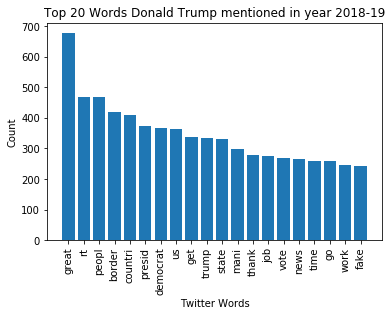

In [27]:
#Words Frequency 2018-19
wordlist_freq2018 = []

for key, value in words_count['2018'].items():
    wordlist_freq2018.append((value, key))
    
wordlist_freq2018.sort(reverse=True)
top20words_2018 = wordlist_freq2018[0:20]
values, word = zip(*top20words_2018)
top20words_2018[0:5]

plt.bar(word, values)
plt.xlabel('Twitter Words')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 20 Words Donald Trump mentioned in year 2018-19')
plt.show()

## Sentiment Analysis

In [40]:
tweetlist['2015']

' a great day in south carolina. record crowd and fantastic enthusiasm. this is now a movement to make america great again! i predict that dying @unionleader newspaper, which has been run into the ground by publisher "stinky" joe mcquaid, will be dead in 2 years! a lovely letter from the daughter of the late great john wayne. our country could use a john wayne right now.   great poll- thank you nevada!\n#makeamericagreatagain #trump2016   i\'m going to be live with @ericbolling and @kimguilfoyle to ring in the new year 2016. everybody should tune in to @foxnews tomorrow night! thank you hilton head, south carolina! #makeamericagreatagain #trump2016   thank you hilton head, south carolina! @scteamtrump #trump2016     i never thought i\'d be saying this but i\'ve really enjoyed  @richlowry on television lately, and he was terrific hosting @seanhannity joe mcquaid (@deucecrew) is desperately trying to sell the @unionleader. it\'s a loser, and my comments haven\'t helped him much. the dyin

In [48]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment = {}
sentiment_year = {}

for i in range (2015,2019):
    polarity = [0]*len(newTweetListsforYears[str(i)])
    Pol_scores = []

    for j, tweet in enumerate(newTweetListsforYears[str(i)]):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        tweet = re.sub(r'@\S+', ' ',tweet)
        tweet = re.sub(r'&\w+', ' ',tweet)
        tweet = re.sub(r'#\S+', ' ',tweet) 
        tweet = re.sub(r'[^a-z\s]+', ' ',tweet) 
        sentiment[j] = analyzer.polarity_scores(tweet)
        polarity[j] = sentiment[j]['compound']
        Pol_scores.append(polarity[j])
    sentiment_year[str(i)] = Pol_scores


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijle\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


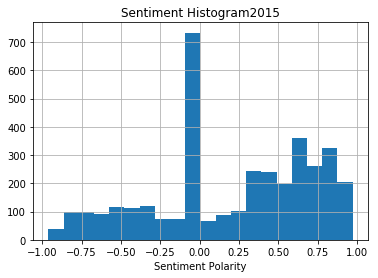

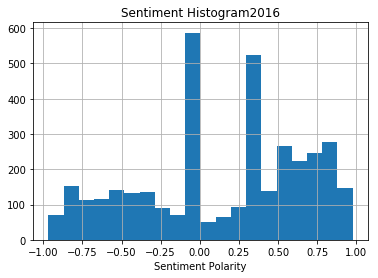

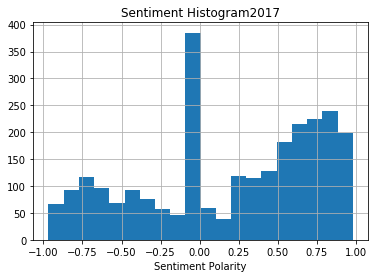

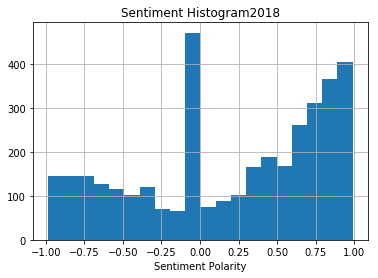

In [50]:
for i in range (2015,2019):
    df[str(polarity)+str(i)] = pd.DataFrame(sentiment_year[str(i)])
    df[str(polarity)+str(i)].hist(bins=20)
    plt.title('Sentiment Histogram'+str(i))
    plt.xlabel('Sentiment Polarity')
    plt.show()  

According to the sentiment analysis, It seems that in all the grouped year, his tweet was mostly neutral. But then If we look at the year 2016-2017, year just before the election, There was suddeny spike in positive tweets too (might be the context of his tweets were negative but if he was tweeting like "I do not find this great", So actually context is negative but then words polarity for "Not" and "great" is canceling each other out and compound polarity is coming our mainly neutral).

Now If we look at the graph of year 2018-2019, It depicts that mostly sentiment attached to his tweets were either positive or neutral.

## Visual representation through word cloud starting from year 2015 to 2019

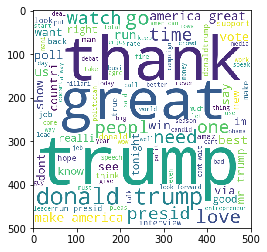

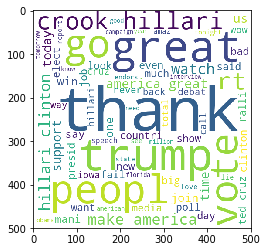

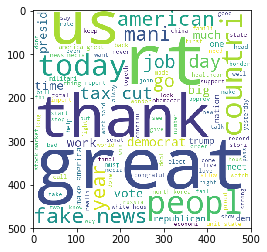

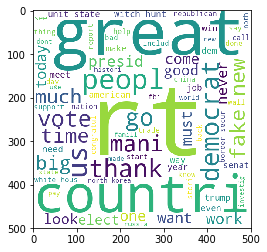

In [55]:
# Generate word cloud: WordCloud function requires a text corpus as input
from wordcloud import WordCloud
for i in range(2015,2019):
    text_corpus = ' '.join(stemmed_words[str(i)])
    wordcloud = WordCloud(width=500, height=500, background_color='white', 
            min_font_size =12).generate(text_corpus)
    plt.imshow(wordcloud)
    plt.show()